Frame resolution: 1000x1000


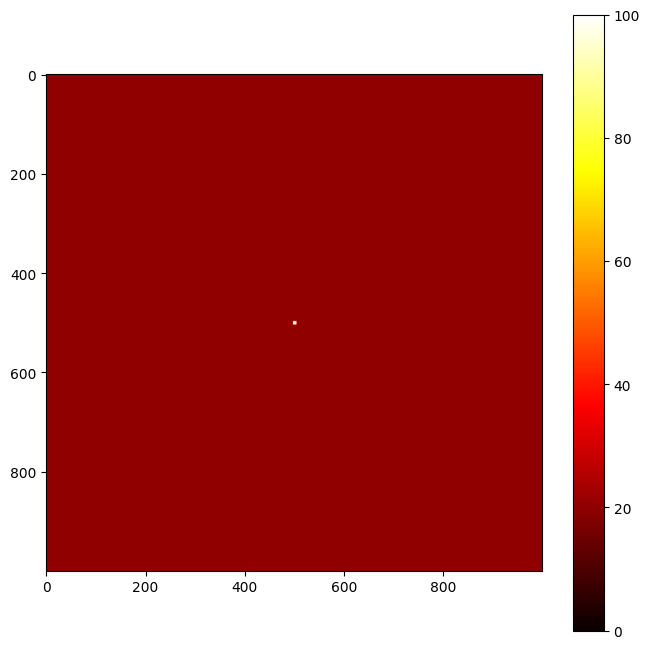

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import glob

# Get list of all frame files
frame_files = sorted(glob.glob('main/Data/parallel-mpiomp_-O0_np2_nt2/frame_*.bin'))
dtype = np.float32

# Read first frame to get dimensions
first_frame = np.fromfile(frame_files[0], dtype=dtype)

# Compute width and height
num_elements = first_frame.size  # Total number of elements
# should be explicitly passed
height = int(np.sqrt(num_elements))
width = height

print(f"Frame resolution: {width}x{height}")

first_frame = first_frame.reshape((width, height))

# Create figure and axis
fig, ax = plt.subplots(figsize=(8,8))

# Initialize plot with first frame
img = ax.imshow(first_frame, cmap='hot', animated=True)
plt.colorbar(img)

# Animation update function
def update(frame):
    data = np.fromfile(frame_files[frame], dtype=dtype)
    data = data.reshape((width, height))  # Corrected reshaping
    img.set_array(data)
    return [img]

# Create animation
anim = FuncAnimation(fig, update, frames=len(frame_files), interval=100, blit=False)

# Display animation in notebook
from IPython.display import HTML
HTML(anim.to_jshtml())
